# Week 9 Instructor-Led Lab
### BGEN 623 | University of Montana MSBA Program
### Alex McKenzie | April 28, 2025

In [7]:
# load modules


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

CA_Hospital = pd.read_csv("/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week9labs/data/CaliforniaHospitalData.csv")

In [8]:
# set working directory

os.chdir("/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week9labs/data")
os.getcwd()

'/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week9labs/data'

In [14]:
# Load and merge data correctly

# Load hospital data
hospital_df = pd.read_csv("CaliforniaHospitalData.csv")

# Load personnel data
personnel_df = pd.read_csv("CaliforniaHospitalData_Personnel.txt", sep="\t")

# Merge on HospitalID
merged_df = pd.merge(hospital_df, personnel_df, on="HospitalID")

# Drop the unwanted columns
merged_df = merged_df.drop(columns=["Work_ID", "PositionID", "Website"])

# Inspect the merged result
print("Columns in merged_df:", merged_df.columns.tolist())
merged_df.head()


Columns in merged_df: ['HospitalID', 'Name', 'Zip', 'TypeControl', 'Teaching', 'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds', 'LastName', 'FirstName', 'Gender', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate', 'Phone', 'Email']


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,20348596.22,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,37832448.33,...,107,Adamson,David,M,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,24661355.90,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,15159986.51,...,42,Iwata,Akira,M,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu


In [15]:
# This cell was written by ChatGPT

# choose an existing hospital
existing_id = merged_df["HospitalID"].iloc[3]

# grab its row as a dict to reuse most hospital fields
base = merged_df[merged_df["HospitalID"] == existing_id].iloc[0].to_dict()

# overwrite with my personnel info
base.update({
    "LastName":   "McKenzie",
    "FirstName":  "Alex",
    "Gender":     "M",
    "PositionTitle":      "Regional Representative",
    "Compensation":       75000,
    "MaxTerm":            4,
    "StartDate":          pd.to_datetime("2025-04-28")
})

# turn into 1-row DataFrame and append
new_row_df = pd.DataFrame([base])
merged_df = pd.concat([merged_df, new_row_df], ignore_index=True)

# inspect
merged_df.tail()


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,109328611.1,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,662155885.7,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,296020659.9,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,461675838.2,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com
61,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,24661355.9,...,55,McKenzie,Alex,M,Regional Representative,75000,4,2025-04-28 00:00:00,785-532-9779,melissa.roberts@txbiomed.net


In [17]:
# Convert Start Date to datetime
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'])

# Convert object columns to categorical
for col in ['TypeControl', 'Teaching', 'DonorType', 'Gender']:
    merged_df[col] = merged_df[col].astype('category')

# Quick check of dtypes
merged_df.dtypes[['StartDate', 'TypeControl', 'Teaching', 'DonorType', 'Gender']]


StartDate      datetime64[ns]
TypeControl          category
Teaching             category
DonorType            category
Gender               category
dtype: object

## I asked ChatGPT the following re: the last cell:

##### "why wouldn't Name, Last Name, First Name, Position Title, and Email columns also get converted from object to categorical?"


##### ChatGPT said: "Good question. It really comes down to the semantics and cardinality of those fields: Name, LastName, FirstName, and Email are effectively unique identifiers or near-unique strings. Turning them into pandas category would create as many categories as there are rows, offering no memory or performance benefit—and in fact can slow lookups when there’s little repetition."

## This was a helpful exchange for my understanding!

In [18]:
# Ok so here we're selecting just the numeric columns and requesting the summary of the aggregate data. I am lost on the "T" at the end of line 3.
num_cols = merged_df.select_dtypes(include=[np.number]).columns
numeric_summary = merged_df[num_cols].agg(['mean', 'median', 'min', 'max']).T
print(numeric_summary)

# Provide summary statistics of the object-dtype columns that aren’t coded as categorical:
text_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
text_summary = merged_df[text_cols].describe()
print(text_summary)

# Provide summary statistics of our categorical variables:
cat_cols = merged_df.select_dtypes(include=['category']).columns.tolist()
cat_summary = merged_df[cat_cols].describe()
print(cat_summary)


                      mean        median           min           max
HospitalID    3.207310e+04  3.326700e+04  1.076700e+04  4.699600e+04
NoFTE         1.334937e+03  3.859100e+02  5.500000e+01  8.000000e+03
NetPatRev     6.610285e+05  1.670720e+05  1.417224e+04  4.662582e+06
InOperExp     1.639660e+08  3.124469e+07  1.436471e+06  1.285631e+09
OutOperExp    8.910169e+07  3.259692e+07  3.787718e+06  6.621559e+08
OperRev       2.529639e+08  6.153388e+07  5.235317e+06  1.912179e+09
OperInc      -1.038045e+05  1.615009e+06 -3.211633e+08  1.648724e+08
AvlBeds       1.922742e+02  9.900000e+01  1.200000e+01  9.090000e+02
Compensation  9.248803e+04  4.697800e+04  2.398700e+04  2.489040e+05
MaxTerm       4.241935e+00  4.000000e+00  2.000000e+00  8.000000e+00
                                Name    Zip LastName FirstName  \
count                             62     62       62        62   
unique                            61     61       24        20   
top     Ridgecrest Regional Hospital  93555

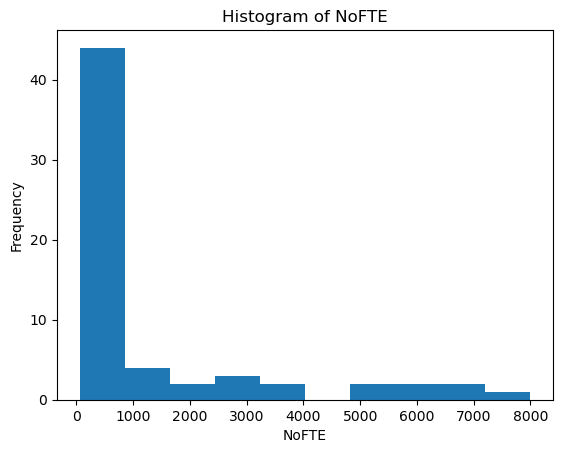

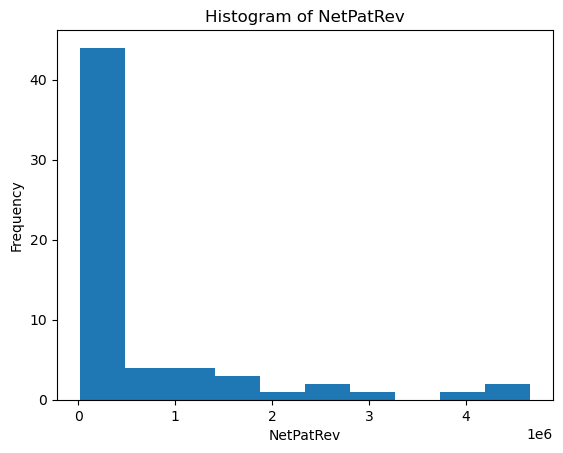

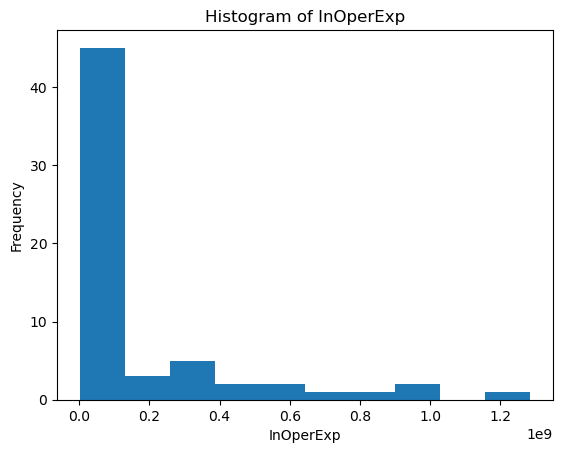

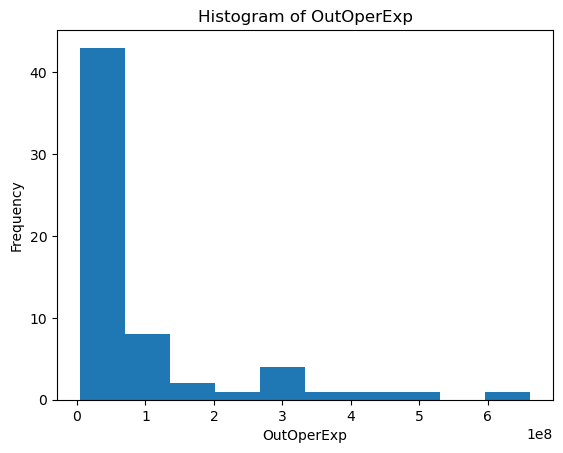

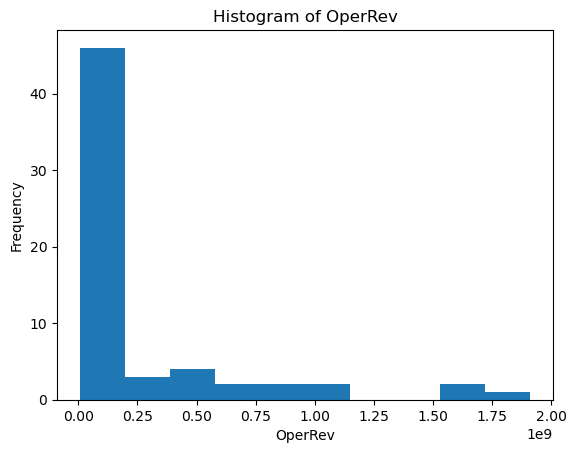

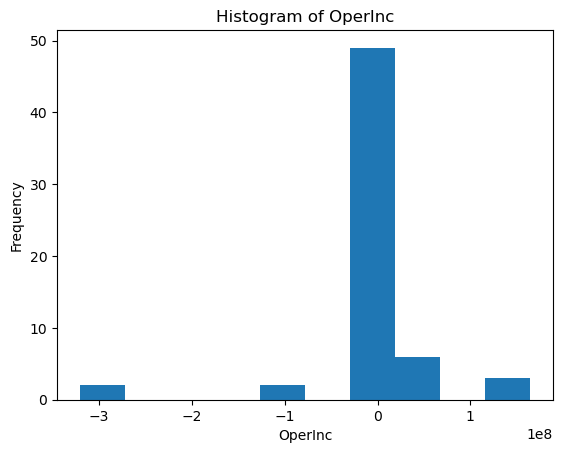

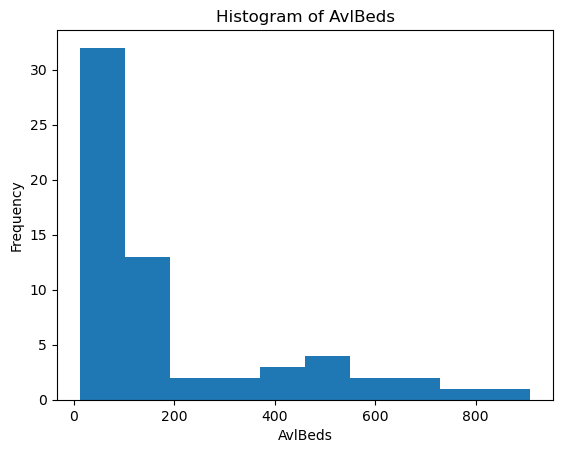

In [19]:
# Create some visuals to explore the data:

# Plot histograms
vars_to_plot = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in vars_to_plot:
    plt.figure()
    plt.hist(merged_df[var].dropna())
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


#### I got stuck on the last cell because my visuals wouldn't output; turns out I forgot to import the stats packages in cell 2. In my haste to get that cleaned up, I messed up something else that caused a chain reaction throughout my notebook. I had to go back to cell two and have ChatGPT get me back on track.

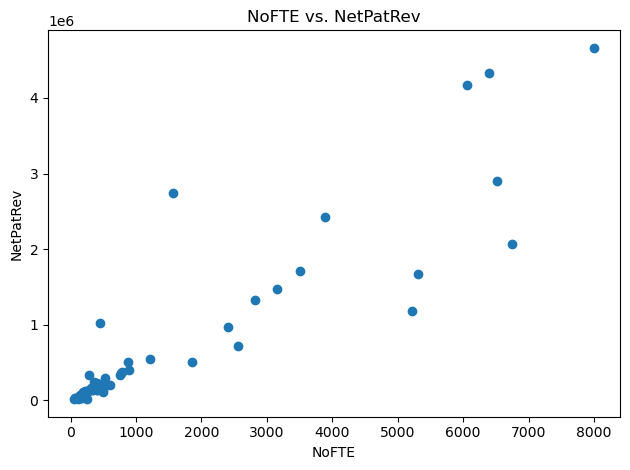

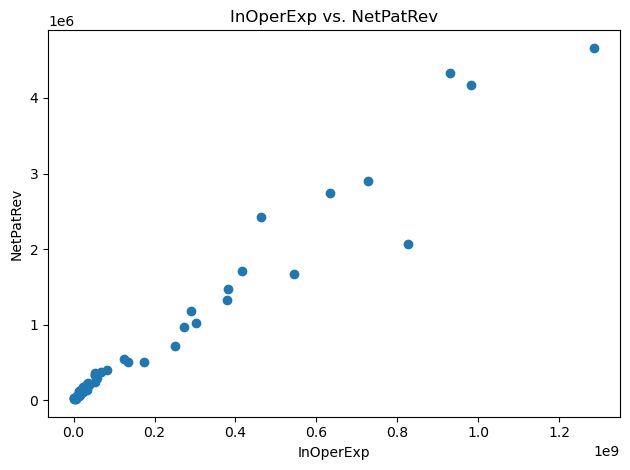

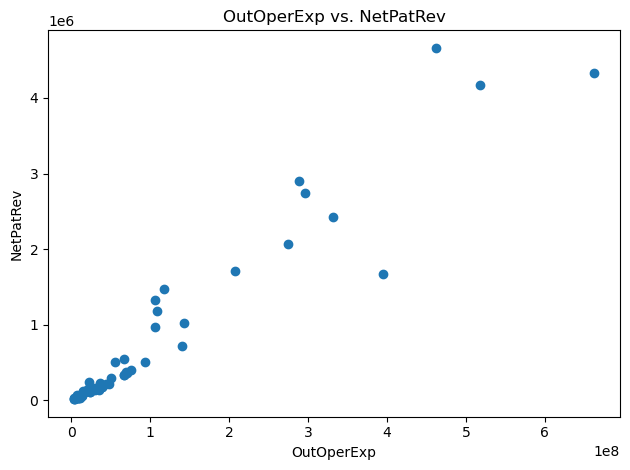

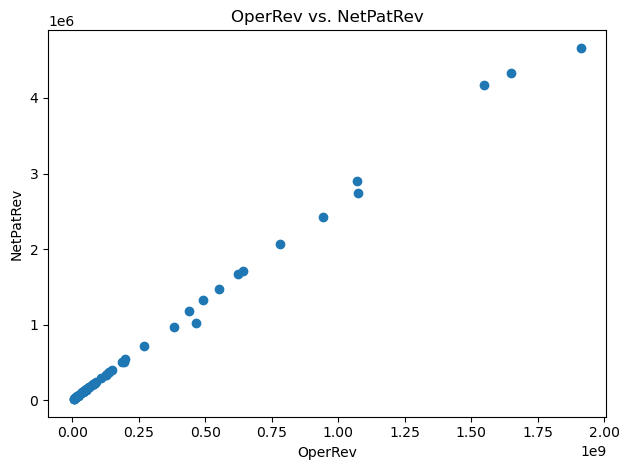

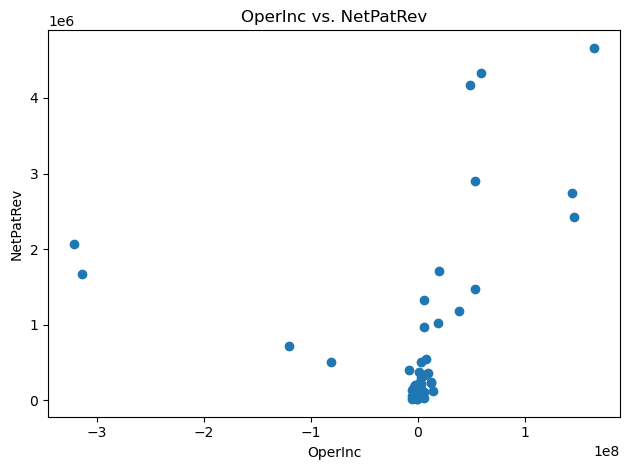

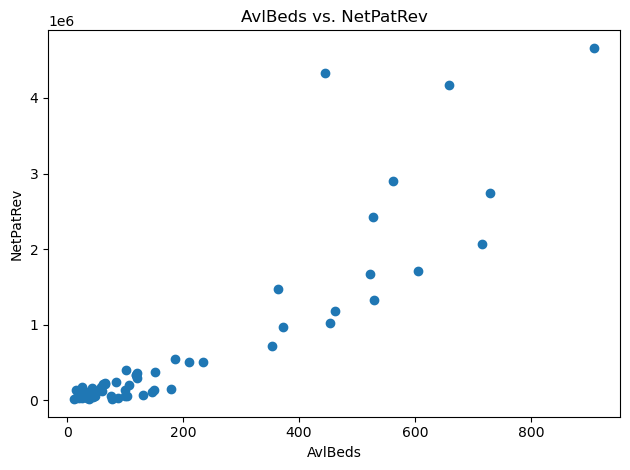

In [20]:
# Scatterplots of each variable vs. net patient revenue:
vars_to_plot = ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in vars_to_plot:
    plt.figure()
    plt.scatter(merged_df[var], merged_df['NetPatRev'])
    plt.title(f'{var} vs. NetPatRev')
    plt.xlabel(var)
    plt.ylabel('NetPatRev')
    plt.tight_layout()
    plt.show()

#### Plot 1: Cluster suggests no FTEs begats no net patient revenues (not surprising!)  

#### Plot 2: Low in-patient operating expenses correlates with low net patient revenues. As InOperExp increase, so do revenues.

#### Plot 3: Similar to Plot 2, where low out-patient operating expenses correlates with low net patient revenues. As OutOperExp increase, so do revenues.

#### Plot 4: Hospitals are near break-even when NetPatRev is around ~.5; then the hospitals generally start to see revenues grow in concert with NetPatRev, but note there is some heteroscedasticity here where there are a couple data points showing NetPatRev of ~2, yet the hospitals are operating at a loss.

#### Plot 5: Fairly linear relationship where increase in available beds drive increases in net patient revenue.

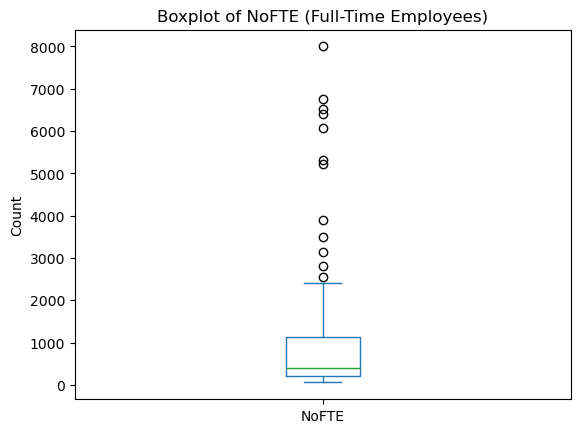

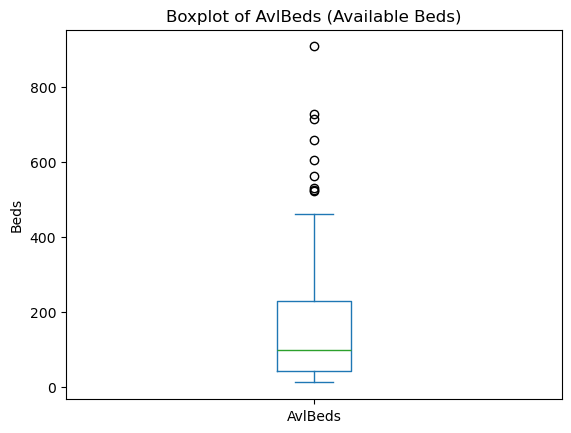

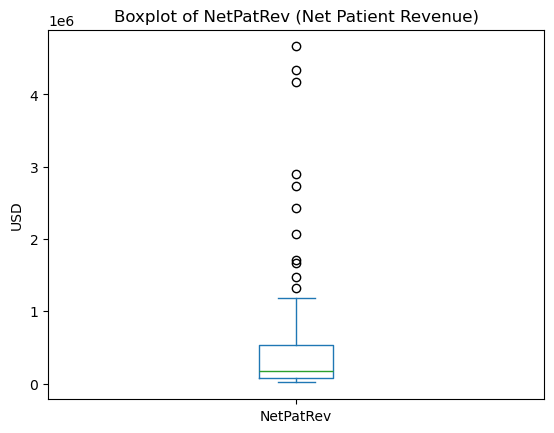

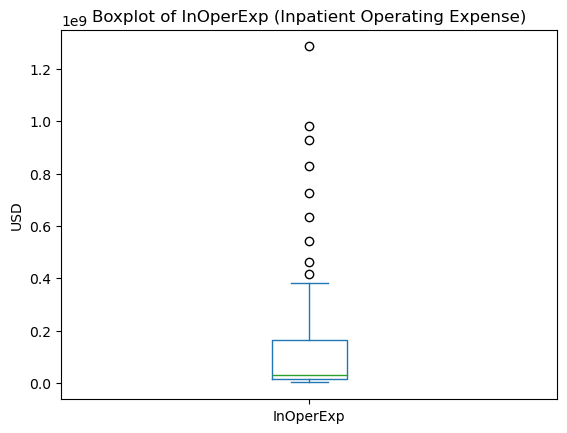

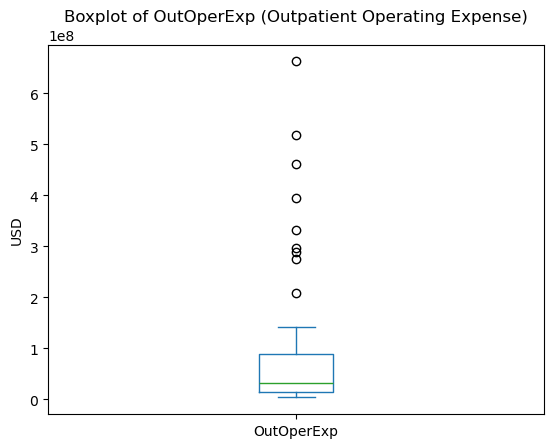

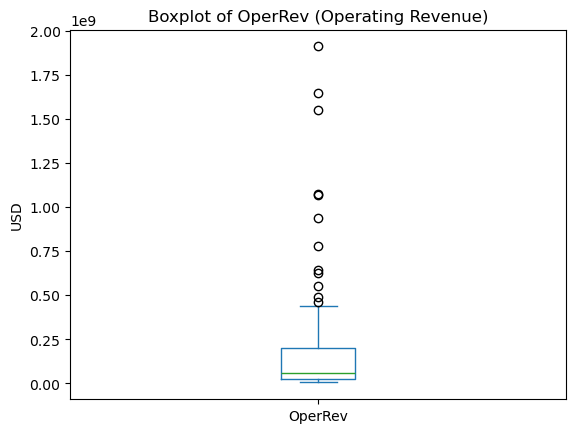

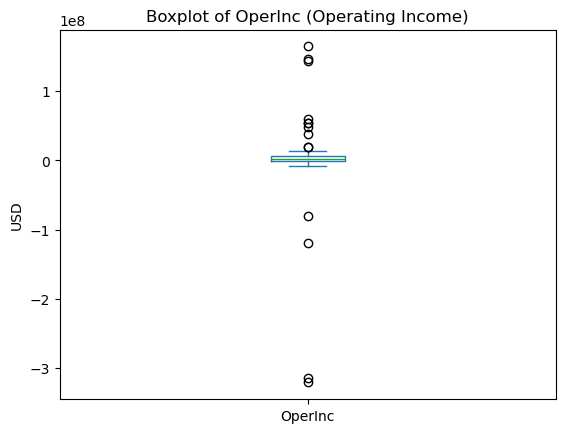

In [22]:
# For both staffing/bed and financial variables, we use a process of 1) creating a merged dataframe, and 2) defining the data and label of the Y axis.

# Boxplots for staffing and bed availability

merged_df['NoFTE'].plot.box()
plt.title('Boxplot of NoFTE (Full-Time Employees)')
plt.ylabel('Count')
plt.show()

merged_df['AvlBeds'].plot.box()
plt.title('Boxplot of AvlBeds (Available Beds)')
plt.ylabel('Beds')
plt.show()


# Boxplots for financial variables
merged_df['NetPatRev'].plot.box()
plt.title('Boxplot of NetPatRev (Net Patient Revenue)')
plt.ylabel('USD')
plt.show()

merged_df['InOperExp'].plot.box()
plt.title('Boxplot of InOperExp (Inpatient Operating Expense)')
plt.ylabel('USD')
plt.show()

merged_df['OutOperExp'].plot.box()
plt.title('Boxplot of OutOperExp (Outpatient Operating Expense)')
plt.ylabel('USD')
plt.show()

merged_df['OperRev'].plot.box()
plt.title('Boxplot of OperRev (Operating Revenue)')
plt.ylabel('USD')
plt.show()

merged_df['OperInc'].plot.box()
plt.title('Boxplot of OperInc (Operating Income)')
plt.ylabel('USD')
plt.show()

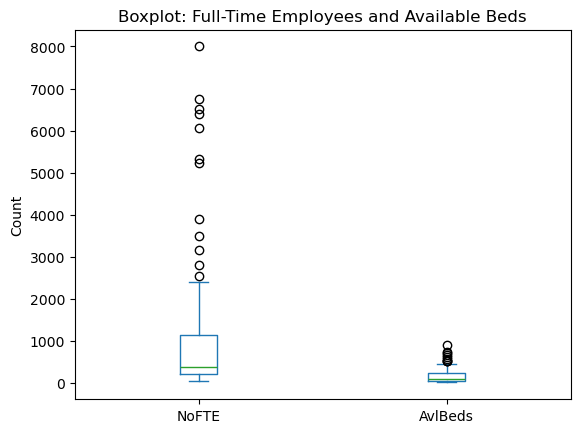

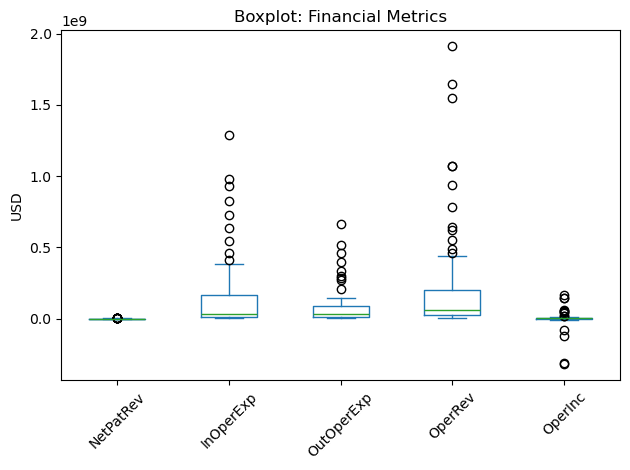

In [23]:
# That worked, but it's a bit clunky. Let's combine them into two separate plots:

# Combined box plots for staffing/bed counts and financial metrics

# Plot 1: Staffing and Beds
merged_df[['NoFTE', 'AvlBeds']].plot.box()
plt.title('Boxplot: Full-Time Employees and Available Beds')
plt.ylabel('Count')
plt.show()

# Plot 2: Financial Metrics
merged_df[['NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc']].plot.box(rot=45)
plt.title('Boxplot: Financial Metrics')
plt.ylabel('USD')
plt.tight_layout()
plt.show()


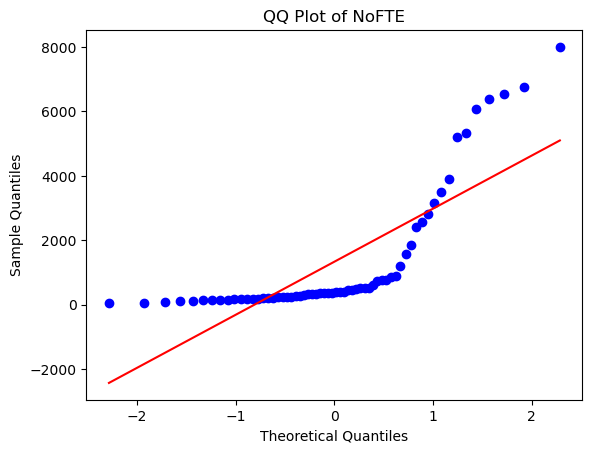

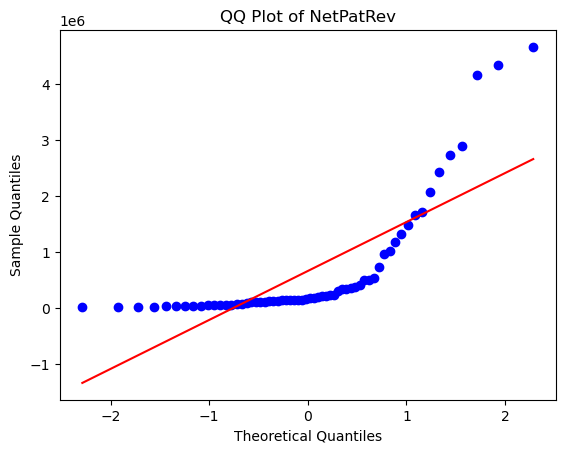

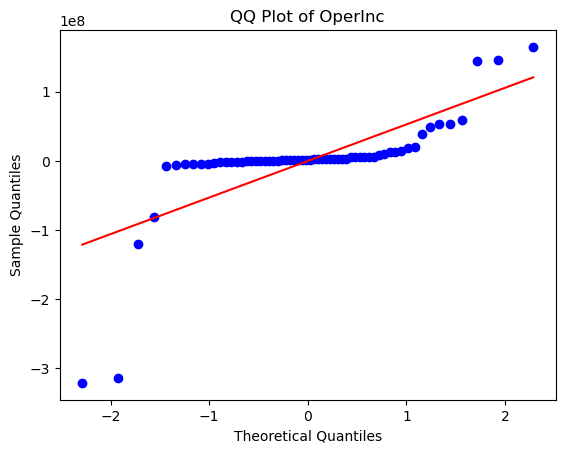

In [25]:
# QQ‐plot for NoFTE
sts.probplot(merged_df['NoFTE'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of NoFTE')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# QQ‐plot for NetPatRev
sts.probplot(merged_df['NetPatRev'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of NetPatRev')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# QQ‐plot for OperInc
sts.probplot(merged_df['OperInc'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of OperInc')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Assessment of Normality

##### NoFTE: Points hug the line somewhat in the middle but splay out at both ends. Honestly I'm a bit confused by this because I don't understand how a hospital group could have negative FTEs?

##### NetPatRev: It appears as though a handful of hospitals outperform all others in NetPatRev.

##### OperInc: Deviations from the norm on both sides of 0, indicating that only a handful of hospitals see large operating profits/losses.

In [28]:
# I really needed help on this one, as I was unclear on the nature/purpose of a Shapiro-Wilk test, as well as how to code it.

# check normality of NoFTE
W, p_value = sts.shapiro(merged_df['NoFTE'])
print(f"NoFTE — W = {W:.4f}, p = {p_value:.4f}")

# Net patient revenue
W_net, p_net = sts.shapiro(merged_df['NetPatRev'])
print(f"NetPatRev — W = {W_net:.4f}, p = {p_net:.4f}")

# Operating income
W_inc, p_inc = sts.shapiro(merged_df['OperInc'])
print(f"OperInc     — W = {W_inc:.4f}, p = {p_inc:.4f}")


NoFTE — W = 0.6405, p = 0.0000
NetPatRev — W = 0.6187, p = 0.0000
OperInc     — W = 0.5554, p = 0.0000


### I was still pretty lost on this Shapiro-Wilk concept, but ChatGPT has me oriented now: 

##### ChatGPT: "What this means for your analysis:  NoFTE: Although the QQ-plot looked reasonably straight in the center, the low W and p < 0.05 tell you the tails deviate enough to fail the normality test.  NetPatRev & OperInc: As you observed, these financial variables are heavily right-skewed. The Shapiro–Wilk results quantify that non-normality."

##### So my (Alex's) read on this is that those three QQ plots fail the Shapiro-Wilk test because the our W values are significantly lower than 1 (meaning they are not significantly not normally distributed), and that our p-values of 0 show that our data is not even drawn from a normal distribution.

# References & Notes  

While I used ChatGPT extensively for this assignment, I put significant time into understanding the analysis being conducted than I did writing the code. It's actually very prescient timing for some work I'm doing i my professional life.

https://drive.google.com/file/d/16HcDGcq0iSAtSzDFuiMlXuRS-ItmSbzZ/view?usp=sharing